# Analyse en composantes principales

In [1]:
from plydata import *
import pandas as pd
decathlon = pd.read_excel("./scientisttoolsdoc/donnee/decathlon2.xlsx",header=0,sheet_name=0,index_col=0)
decathlon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, SEBRLE to Drews
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X100m         27 non-null     float64
 1   Long.jump     27 non-null     float64
 2   Shot.put      27 non-null     float64
 3   High.jump     27 non-null     float64
 4   X400m         27 non-null     float64
 5   X110m.hurdle  27 non-null     float64
 6   Discus        27 non-null     float64
 7   Pole.vault    27 non-null     float64
 8   Javeline      27 non-null     float64
 9   X1500m        27 non-null     float64
 10  Rank          27 non-null     int64  
 11  Points        27 non-null     int64  
 12  Competition   27 non-null     object 
dtypes: float64(10), int64(2), object(1)
memory usage: 3.0+ KB


In [2]:
decathlon

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
name,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar
BARRAS,11.33,6.97,14.09,1.95,49.48,14.48,42.10,4.72,55.40,282.00,11,7708,Decastar


In [3]:
from scientisttools.decomposition import PCA

In [4]:
# Instanciation du modèle
res_pca = PCA(normalize=True,
              n_components = None,
              row_labels=decathlon.index[:23],
              col_labels=decathlon.columns[:10],
              row_sup_labels=decathlon.index[23:],
              quanti_sup_labels=["Rank","Points"],
              quali_sup_labels=["Competition"],
              parallelize=False)
res_pca.fit(decathlon)

PCA(col_labels=Index(['X100m', 'Long.jump', 'Shot.put', 'High.jump', 'X400m', 'X110m.hurdle',
       'Discus', 'Pole.vault', 'Javeline', 'X1500m'],
      dtype='object'),
    quali_sup_labels=['Competition'], quanti_sup_labels=['Rank', 'Points'],
    row_labels=Index(['SEBRLE', 'CLAY', 'BERNARD', 'YURKOV', 'ZSIVOCZKY', 'McMULLEN',
       'MARTINEAU', 'HERNU', 'BARRAS', 'NOOL', 'BOURGUIGNON', 'Sebrle', 'Clay',
       'Karpov', 'Macey', 'Warners', 'Zsivoczky', 'Hernu', 'Bernard',
       'Schwarzl', 'Pogorelov', 'Schoenbeck', 'Barras'],
      dtype='object', name='name'),
    row_sup_labels=Index(['KARPOV', 'WARNERS', 'Nool', 'Drews'], dtype='object', name='name'))

## Eigenvalues

In [5]:
# Extract eigenvalues/variances
from scientisttools.extractfactor import get_eigenvalue
eig_val = get_eigenvalue(res_pca)
print(eig_val)

        eigenvalue  difference  proportion  cumulative
Dim.1     4.124213    2.285682   41.242133   41.242133
Dim.2     1.838531    0.599391   18.385309   59.627443
Dim.3     1.239140    0.419700   12.391403   72.018845
Dim.4     0.819440    0.117887    8.194402   80.213247
Dim.5     0.701553    0.278670    7.015528   87.228776
Dim.6     0.422883    0.120301    4.228828   91.457604
Dim.7     0.302582    0.028112    3.025817   94.483420
Dim.8     0.274470    0.119253    2.744700   97.228120
Dim.9     0.155217    0.033246    1.552169   98.780290
Dim.10    0.121971         NaN    1.219710  100.000000


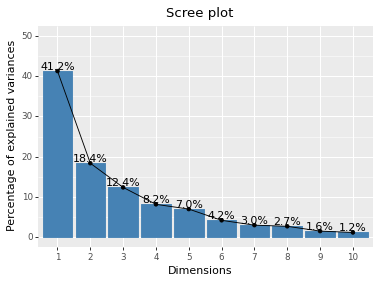

In [6]:
from scientisttools.ggplot import fviz_eig
p = fviz_eig(res_pca,add_labels=True,ylim=(0,50))
print(p)

## Graph of variables

In [7]:
from scientisttools.extractfactor import get_pca_var
var = get_pca_var(res_pca)
var.keys()

dict_keys(['corr', 'pcorr', 'coord', 'cos2', 'contrib', 'ftest', 'cor', 'quanti_sup', 'quali_sup'])

In [8]:
# Coordinates
var["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,-0.850626,0.179398,-0.301556,0.033573,-0.194444,0.035375,-0.091336,-0.104717,-0.303064,0.044418
Long.jump,0.794181,-0.280857,0.190547,-0.115390,0.233157,-0.033728,-0.154331,-0.397381,-0.051590,0.029719
Shot.put,0.733913,-0.085404,-0.517598,0.128468,-0.248813,-0.239789,-0.009887,0.024359,0.047787,0.217452
High.jump,0.610084,0.465214,-0.330085,0.144550,0.402700,-0.284645,0.028157,0.084406,-0.112138,-0.133567
X400m,-0.701603,-0.290178,-0.283533,0.430826,0.103909,-0.049290,0.286106,-0.233552,0.082160,-0.034171
X110m.hurdle,-0.764125,0.024741,-0.448887,-0.016896,0.224220,0.002632,-0.370072,-0.008345,0.161760,-0.015630


### Correlation circle

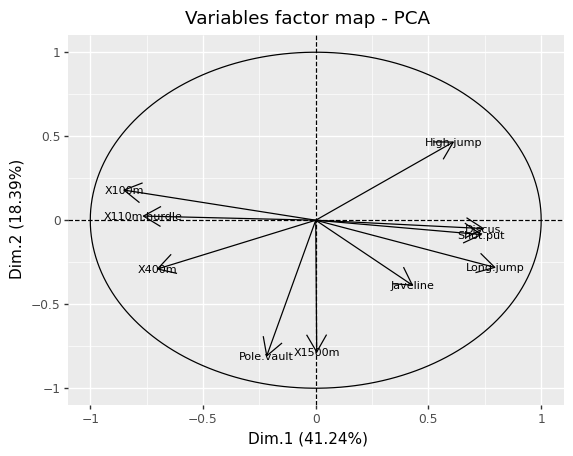

In [9]:
from scientisttools.ggplot import fviz_pca_var
p = fviz_pca_var(res_pca,color="black",repel=False)
print(p)

### Quality of representation

In [10]:
# Cos2
var["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,0.723564,0.032184,0.090936,0.001127,0.037808,0.001251,0.008342,0.010966,0.091848,0.001973
Long.jump,0.630723,0.078881,0.036308,0.013315,0.054362,0.001138,0.023818,0.157911,0.002661,0.000883
Shot.put,0.538628,0.007294,0.267907,0.016504,0.061908,0.057499,0.000098,0.000593,0.002284,0.047285
High.jump,0.372202,0.216424,0.108956,0.020895,0.162167,0.081023,0.000793,0.007124,0.012575,0.017840
X400m,0.492247,0.084203,0.080391,0.185611,0.010797,0.002430,0.081857,0.054547,0.006750,0.001168
X110m.hurdle,0.583887,0.000612,0.201500,0.000285,0.050275,0.000007,0.136953,0.000070,0.026166,0.000244


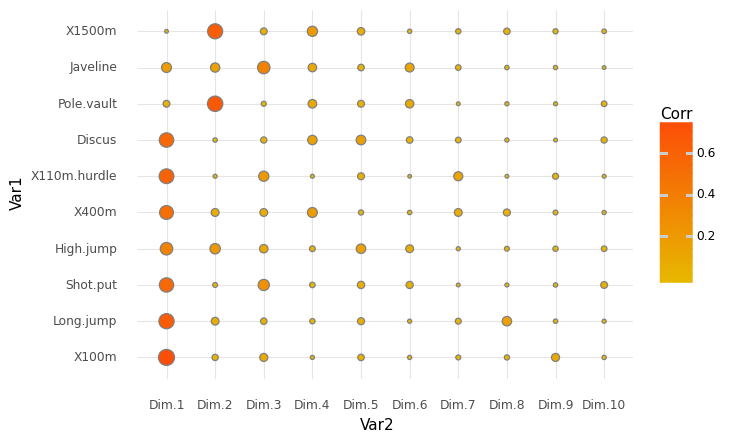

In [11]:
from scientisttools.ggplot import fviz_corrplot
cos2 = var["cos2"]
p = fviz_corrplot(cos2,method="circle",colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)


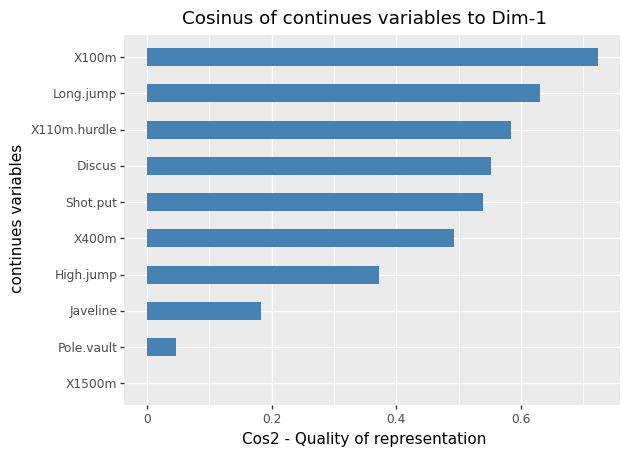

In [12]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(res_pca,choice="var",axis=0)
print(p)

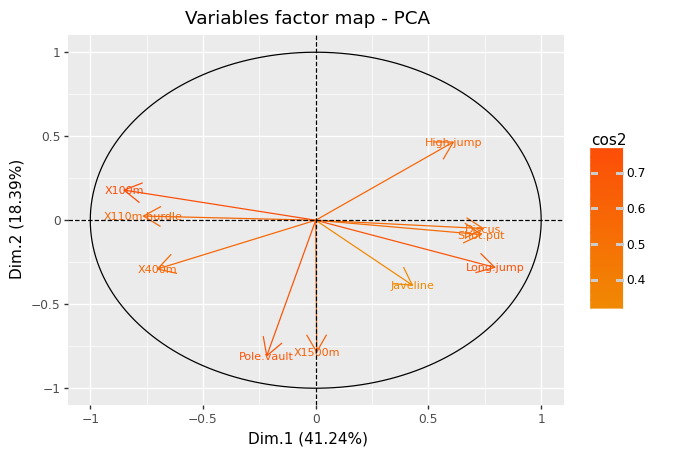

In [13]:
p = fviz_pca_var(res_pca,
                 color="cos2",
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel=False)
print(p)

#### Contributions

In [14]:
# Contributions
var["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,17.544293,1.750510,7.338659,0.137552,5.389252,0.295915,2.757053,3.995204,59.174001,1.617561
Long.jump,15.293168,4.290416,2.930094,1.624859,7.748815,0.269004,7.871594,57.533222,1.714683,0.724144
Shot.put,13.060137,0.396722,21.620432,2.014073,8.824401,13.596859,0.032304,0.216185,1.471201,38.767686
High.jump,9.024811,11.771584,8.792888,2.549880,23.115504,19.159607,0.262026,2.595658,8.101552,14.626491
X400m,11.935544,4.579930,6.487636,22.650906,1.539012,0.574510,27.052747,19.873444,4.348967,0.957305
X110m.hurdle,14.157544,0.033293,16.261261,0.034837,7.166193,0.001639,45.261635,0.025370,16.857939,0.200289


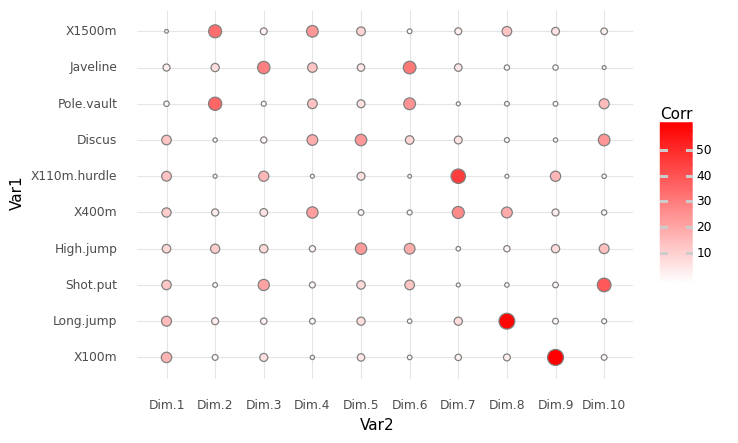

In [15]:
p = fviz_corrplot(var["contrib"])
print(p)

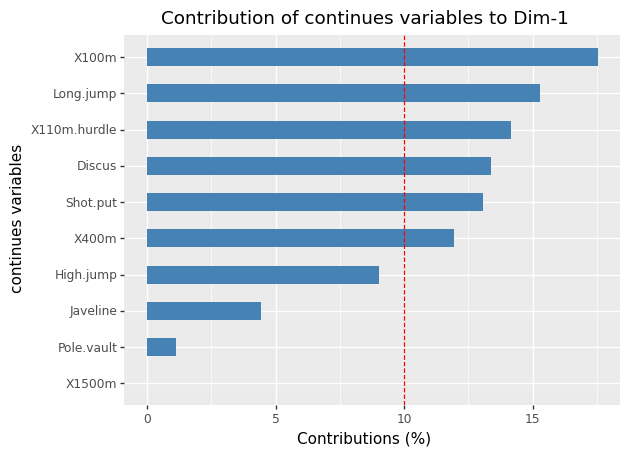

In [16]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(res_pca,choice="var",axis=0,top_contrib=10)
print(p)

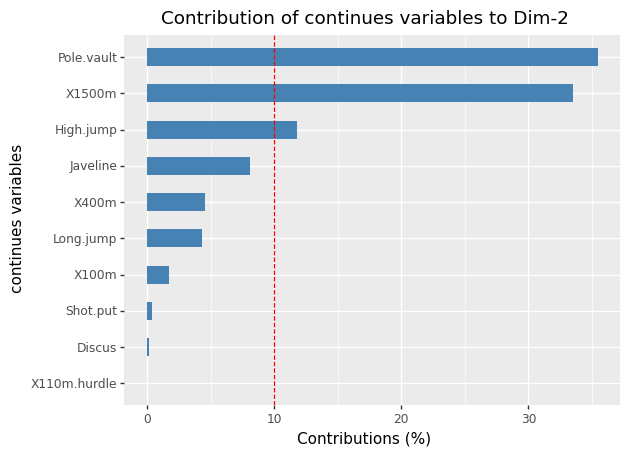

In [17]:
p = fviz_contrib(res_pca,choice="var",axis=1,top_contrib=10)
print(p)

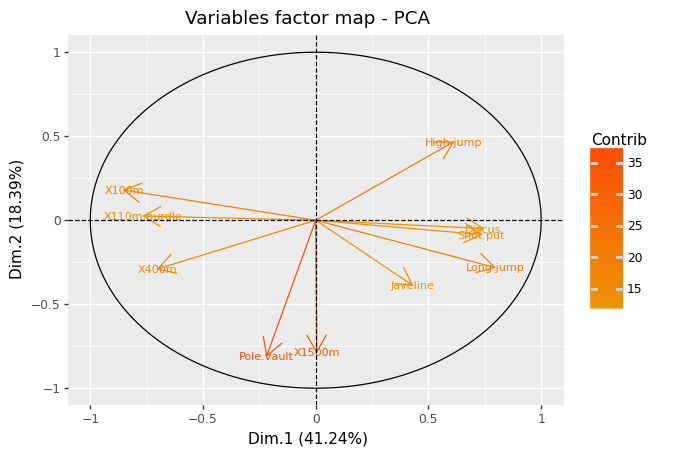

In [18]:
p = fviz_pca_var(res_pca,
                 color="contrib",
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel=False)
print(p)

### Color by a custom continuous

In [19]:
import numpy as np 
np.random.seed(123)
my_cont_var = np.random.normal(size=10)
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:361: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:374: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


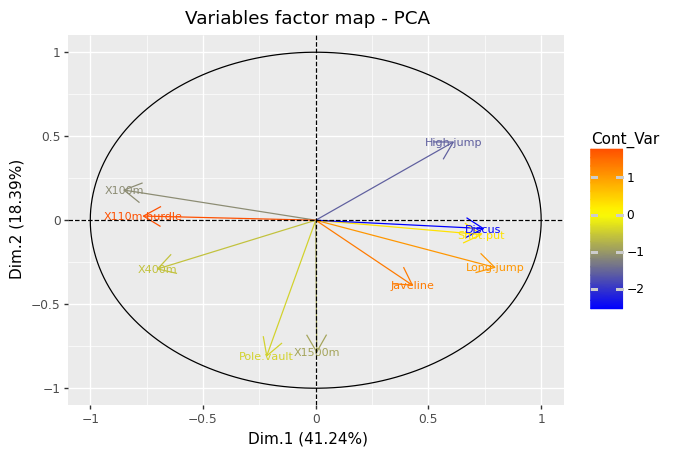

In [20]:
p = fviz_pca_var(res_pca,
                 color=my_cont_var,
                 gradient_cols = ["blue", "yellow", "red"],
                 repel=False)
print(p)

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(var["coord"])
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 2])

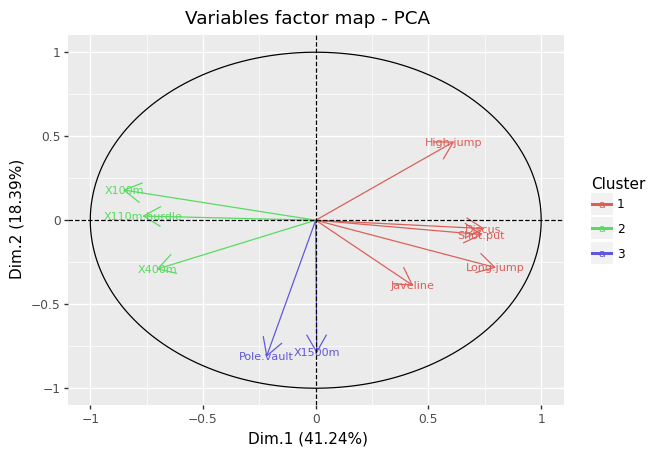

In [22]:
p = fviz_pca_var(res_pca,
                 color=kmeans,
                 gradient_cols = ["blue", "yellow", "red"],
                 legend_title="Cluster",
                 repel=False)
print(p)

In [23]:
from scientisttools.decomposition import dimdesc
dim_desc = dimdesc(res_pca)
dim_desc.keys()

dict_keys(['Dim.1', 'Dim.2', 'Dim.3', 'Dim.4', 'Dim.5', 'Dim.6', 'Dim.7', 'Dim.8', 'Dim.9', 'Dim.10'])

In [24]:
dim_desc["Dim.1"]

,statistic,pvalue
Long.jump,0.794181,6.059893e-06
Discus,0.743209,4.842563e-05
Shot.put,0.733913,6.723102e-05
High.jump,0.610084,1.993677e-03
Javeline,0.428227,4.149192e-02
X400m,-0.701603,1.910387e-04
X110m.hurdle,-0.764125,2.195812e-05
X100m,-0.850626,2.727129e-07


In [25]:
dim_desc["Dim.2"]

,statistic,pvalue
High.jump,0.465214,0.025294
X1500m,-0.784480,0.000009
Pole.vault,-0.807451,0.000003


## Graph of individuals

### Result

In [26]:
from scientisttools.extractfactor import get_pca_ind
row = get_pca_ind(res_pca)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'infos', 'ind_sup'])

### Plots  : quality and contribution

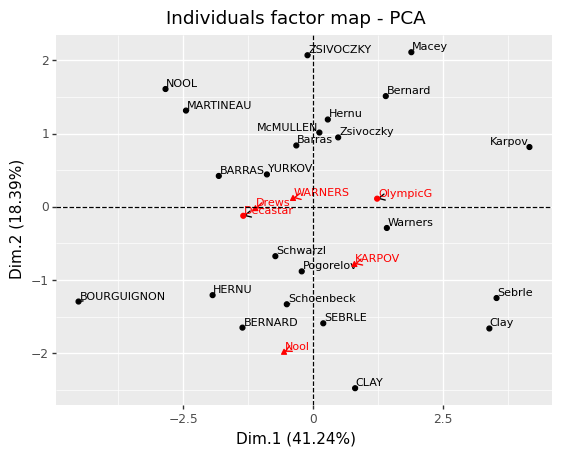

In [27]:
from scientisttools.ggplot import fviz_pca_ind
p = fviz_pca_ind(res_pca,color="black",repel=True)
print(p)

Like variables, it's also possible to color individuals by their cos2 values:

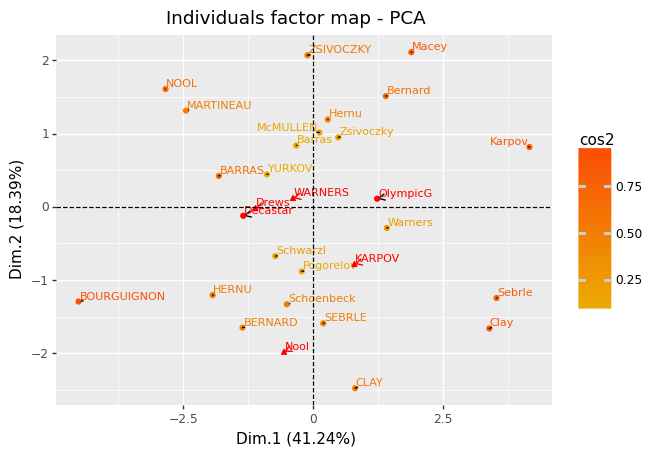

In [28]:
p = fviz_pca_ind(res_pca, color= "cos2", 
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel = True# Avoid text overlapping (slow if many points)
                 )
print(p)

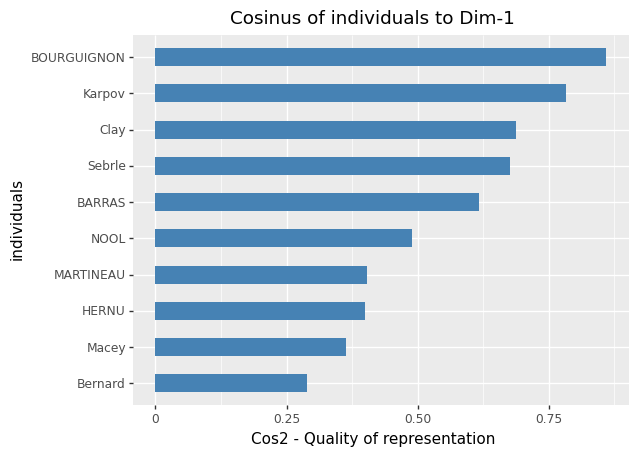

In [29]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(res_pca,choice="ind")
print(p)

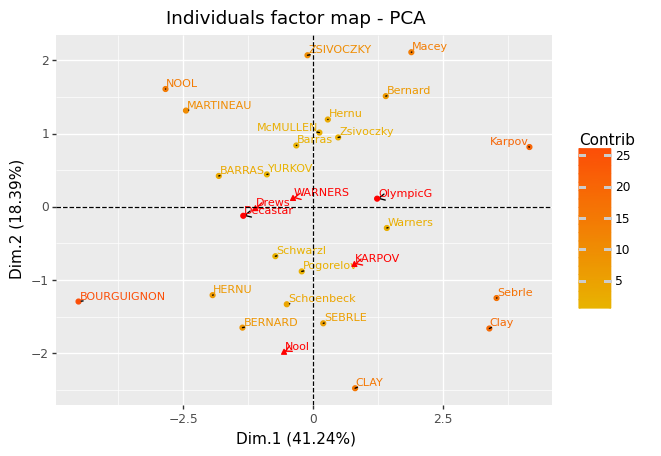

In [30]:
# 
p = fviz_pca_ind(res_pca, color= "contrib", 
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel = True# Avoid text overlapping (slow if many points)
                 )
print(p)

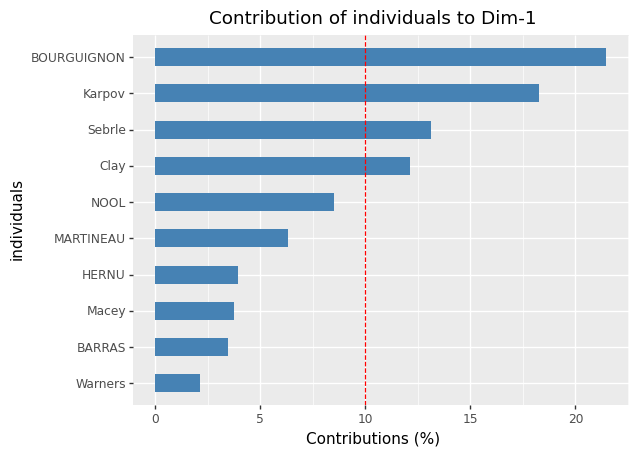

In [31]:
p = fviz_contrib(res_pca,choice="ind")
print(p)

### Color by a custom continuous variable

In [32]:
np.random.seed(123)
my_cont_var = np.random.normal(size=23)
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128  2.20593008  2.18678609
  1.0040539   0.3861864   0.73736858  1.49073203 -0.93583387]


d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:202: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:206: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


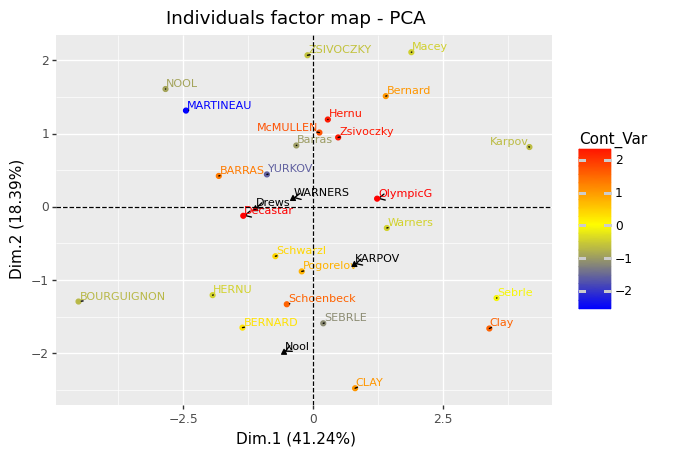

In [33]:
p = fviz_pca_ind(res_pca, color = my_cont_var,
                 gradient_cols = ("blue", "yellow", "red"),
                 legend_title = "Cont_Var",
                 ind_sup=True,
                 color_sup="black",
                 repel=True)
print(p)

In [34]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(row["coord"])
kmeans.labels_

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2])

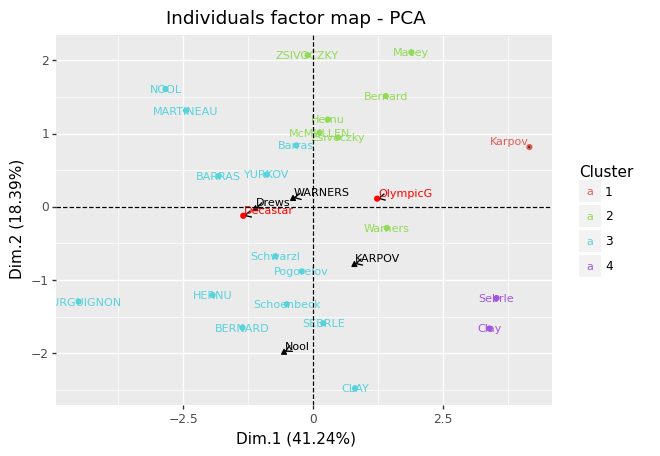

In [35]:
p = fviz_pca_ind(res_pca, color = kmeans,
                 gradient_cols = ("blue", "yellow", "red"),
                 legend_title = "Cluster",
                 ind_sup=True,
                 color_sup="black",
                 repel=True)
print(p)